In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")



In [2]:
df = pd.read_csv("Data\dataset.csv.csv")
df.head()


<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\HOME\AppData\Local\Temp\ipykernel_10060\2825714603.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df = pd.read_csv("Data\dataset.csv.csv")


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [4]:
df.describe()
df.isnull().sum()


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
(df.select_dtypes(include='float64') < 0).sum()


arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

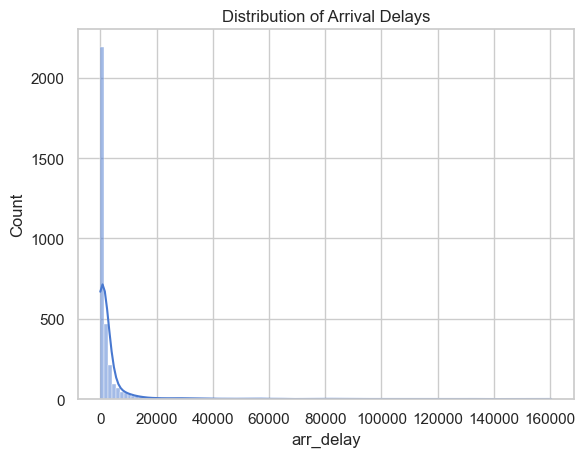

In [8]:
df['arr_delay'].describe()
sns.histplot(df['arr_delay'], kde=True)
plt.title("Distribution of Arrival Delays")
plt.show()


C:\Users\HOME\AppData\Roaming\Python\Python314\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


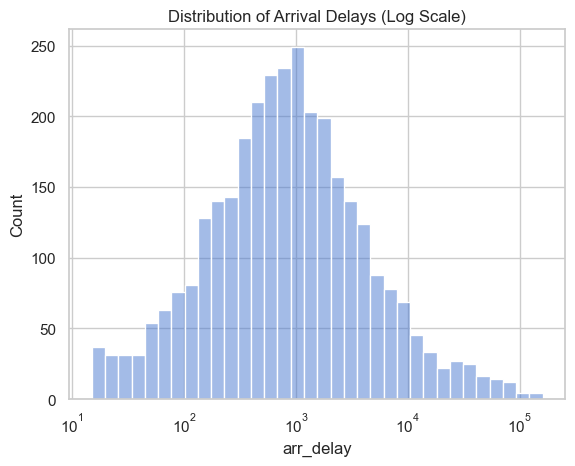

In [9]:
sns.histplot(df['arr_delay'], kde=True, log_scale=True)
plt.title("Distribution of Arrival Delays (Log Scale)")
plt.show()


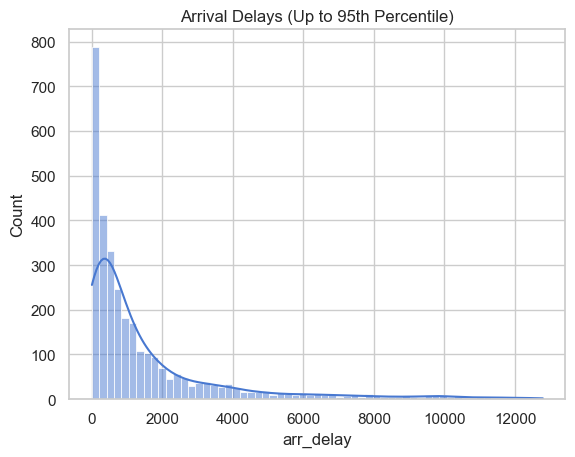

In [10]:
upper_limit = df['arr_delay'].quantile(0.95)

sns.histplot(df[df['arr_delay'] <= upper_limit]['arr_delay'], kde=True)
plt.title("Arrival Delays (Up to 95th Percentile)")
plt.show()


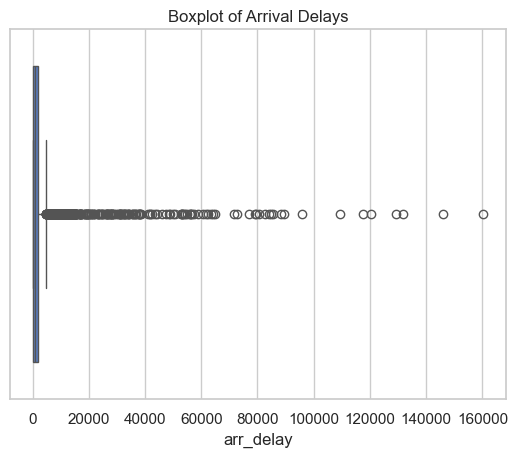

In [11]:
sns.boxplot(x=df['arr_delay'])
plt.title("Boxplot of Arrival Delays")
plt.show()


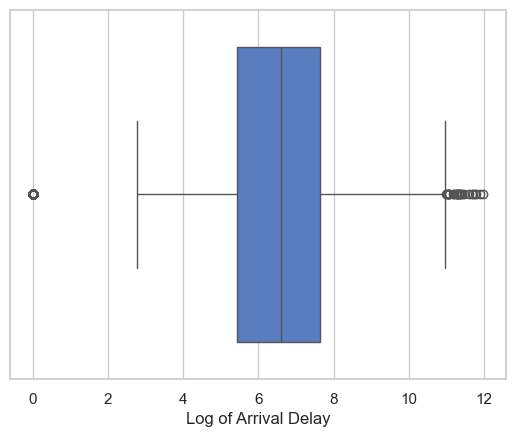

In [12]:
import numpy as np
sns.boxplot(x=np.log1p(df['arr_delay'])) # log1p handles zero/negative values safely
plt.xlabel("Log of Arrival Delay")
plt.show()

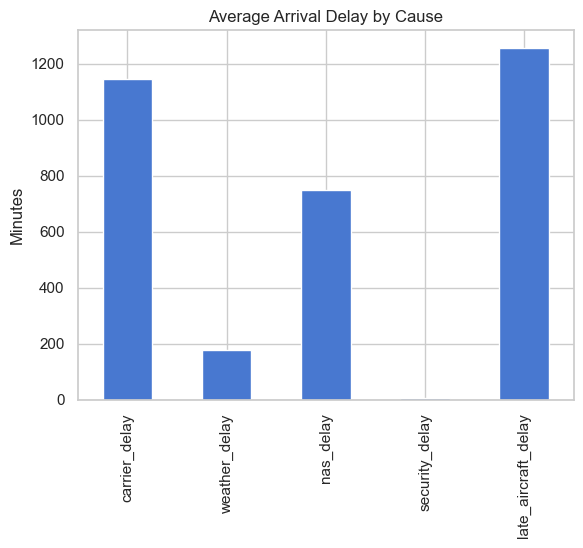

In [13]:
delay_causes = df[['carrier_delay','weather_delay','nas_delay',
                   'security_delay','late_aircraft_delay']].mean()

delay_causes.plot(kind='bar')
plt.title("Average Arrival Delay by Cause")
plt.ylabel("Minutes")
plt.show()


In [14]:
(df[['carrier_delay', 'weather_delay', 'nas_delay',
     'security_delay', 'late_aircraft_delay']] > 0).sum()


carrier_delay          3032
weather_delay          1722
nas_delay              2816
security_delay          361
late_aircraft_delay    2755
dtype: int64

In [15]:
df[['carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay']].sum().sort_values()


security_delay           18055.0
weather_delay           593688.0
nas_delay              2505844.0
carrier_delay          3826943.0
late_aircraft_delay    4200591.0
dtype: float64

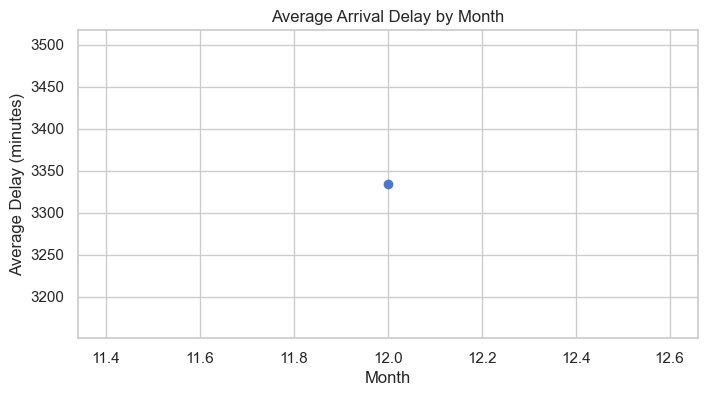

In [16]:
monthly_delay = df.groupby('month')['arr_delay'].mean()

plt.figure(figsize=(8,4))
monthly_delay.plot(kind='line', marker='o')
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.show()


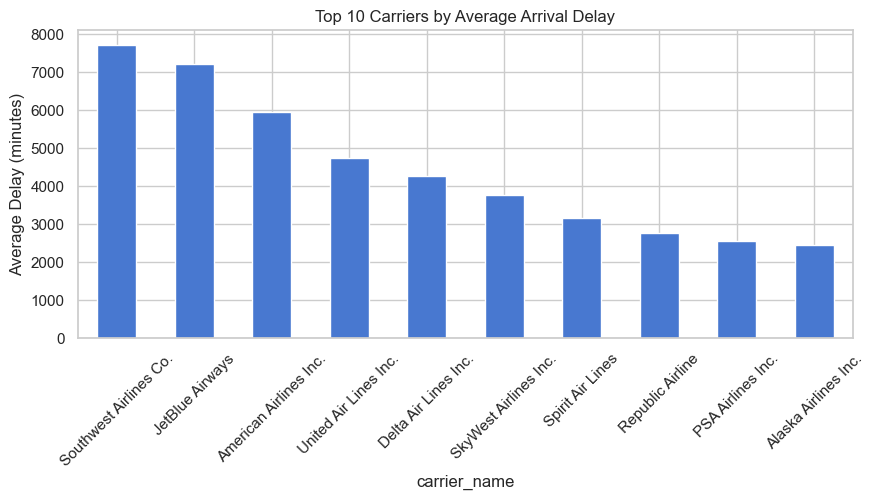

In [17]:
carrier_delay_avg = (
    df.groupby('carrier_name')['arr_delay']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,4))
carrier_delay_avg.plot(kind='bar')
plt.title("Top 10 Carriers by Average Arrival Delay")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()


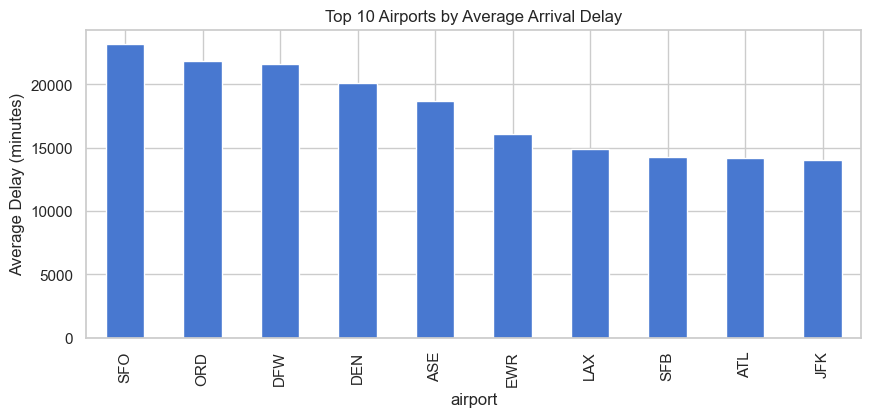

In [18]:
airport_delay = (
    df.groupby('airport')['arr_delay']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

airport_delay.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Airports by Average Arrival Delay")
plt.ylabel("Average Delay (minutes)")
plt.show()


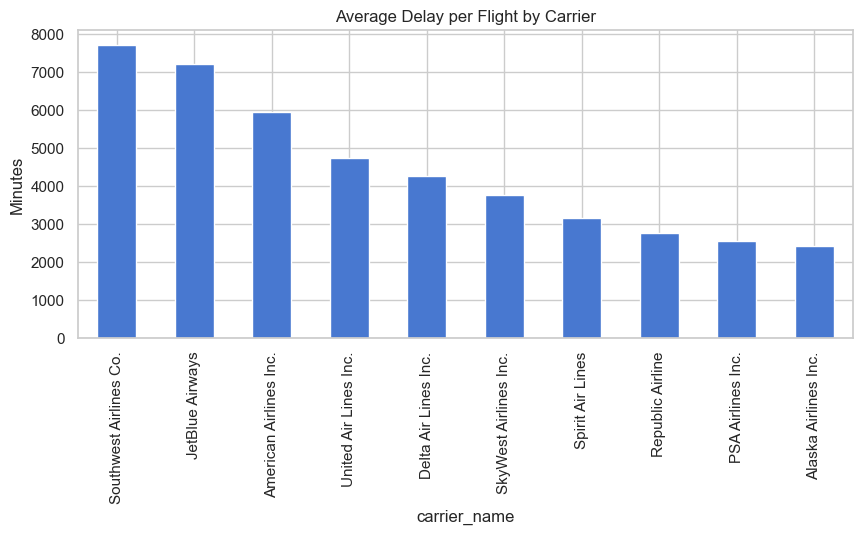

In [19]:
df['delay_per_flight'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 
                             'security_delay', 'late_aircraft_delay']].sum(axis=1)
carrier_delay_pf = (
    df.groupby('carrier_name')['delay_per_flight']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

carrier_delay_pf.plot(kind='bar', figsize=(10,4))
plt.title("Average Delay per Flight by Carrier")
plt.ylabel("Minutes")
plt.show()


Key Findings:

1. Late aircraft delays contribute the highest total delay minutes, indicating cascading operational inefficiencies.

2. Carrier-related delays occur most frequently, suggesting airline-controlled factors dominate delays.

3. Weather delays, while common, have lower overall impact compared to operational causes.

4. Normalizing delay by flight count reveals more realistic delay patterns (~minutes per flight).

Limitations:
1. Dataset contains data for only one month (December 2020), limiting seasonal trend analysis.
2. Delay metrics were initially aggregated; normalization was required for meaningful comparison.
3. Airport-level delays may be influenced by traffic volume, not operational efficiency alone.
